### Exploratory Data Analysis (EDA) and Report Generation 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data Cleaning and Null Value Handling


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Fill 'age' missing values
df['age'] = df['age'].fillna(df['age'].median())

# Fill 'embarked' missing values
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column
df = df.drop('deck', axis=1)

# Drop 'embark_town' column
df = df.drop('embark_town', axis=1)

In [9]:

# Verify again
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

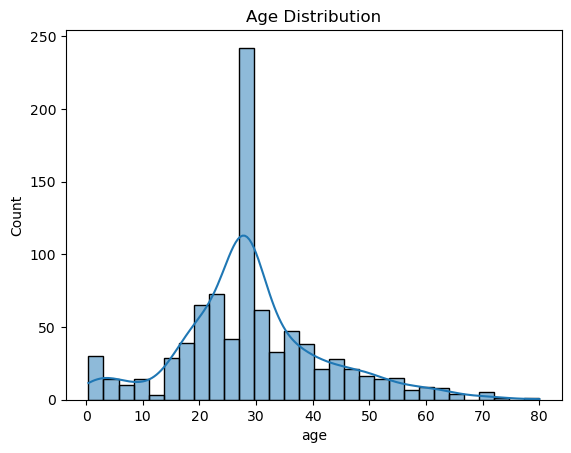

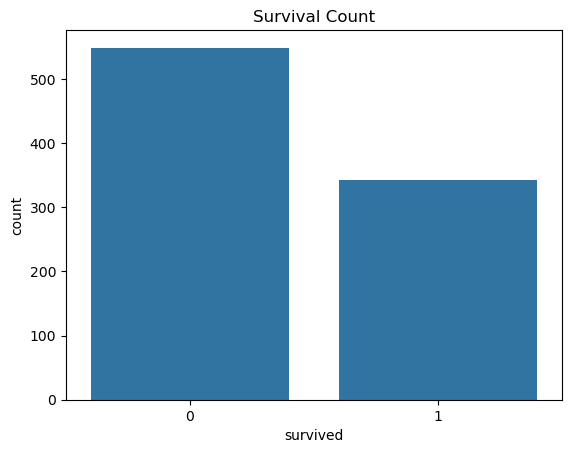

In [10]:
# Plotting distributions
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

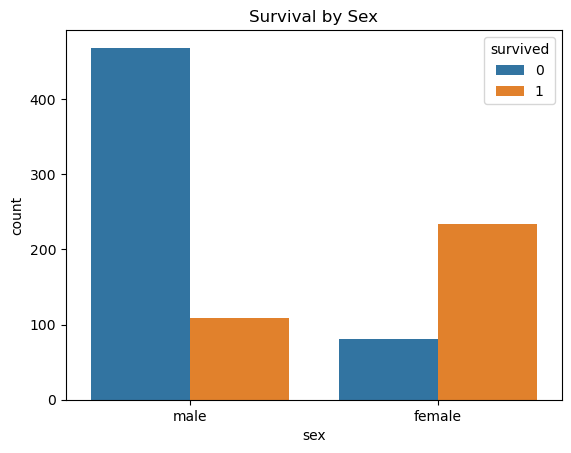

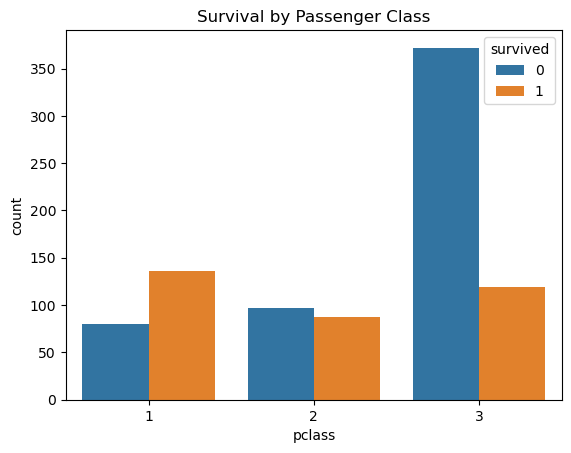

In [11]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival based on Pclass
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

#### Correlation Analysis

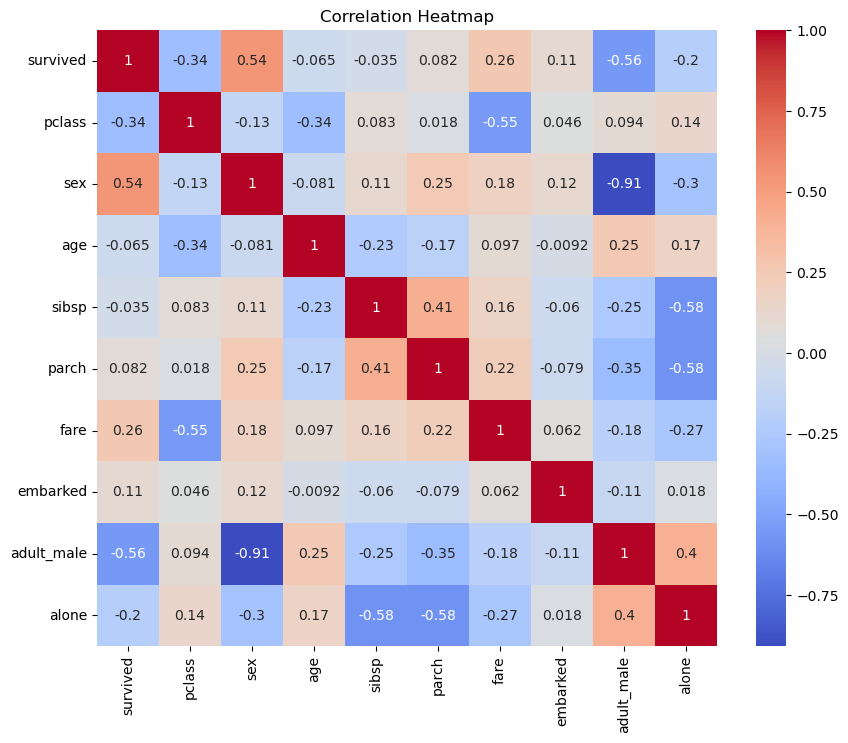

In [12]:
# Encode categorical variables
df_corr = df.copy()
df_corr['sex'] = df_corr['sex'].map({'male':0, 'female':1})
df_corr['embarked'] = df_corr['embarked'].map({'S':0, 'C':1, 'Q':2})

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


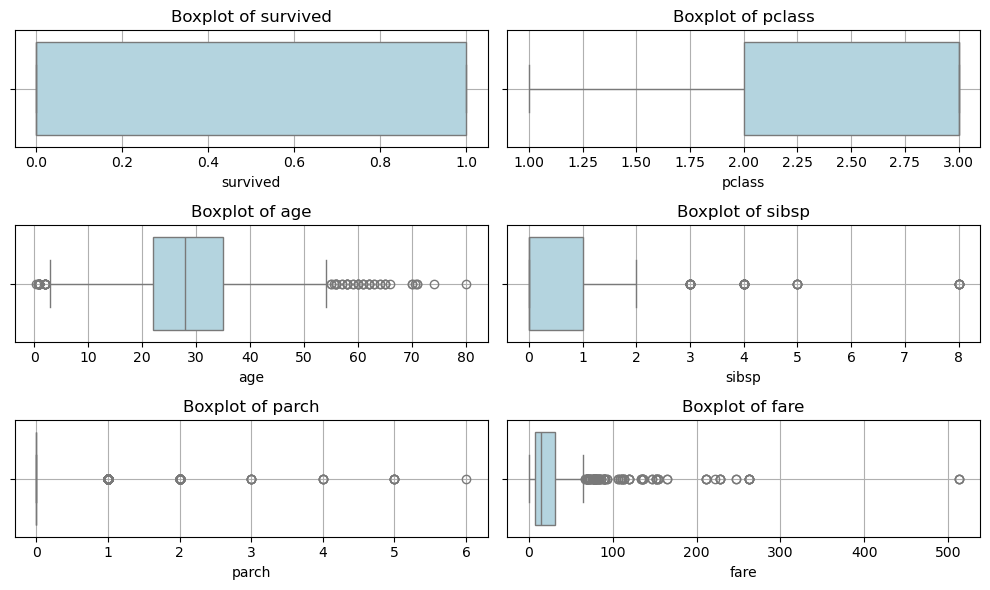

In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
n_rows = (len(numeric_columns) + 2 - 1) // 2  # just hard code with any no. instead of this

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, 2, i + 1)
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)

plt.tight_layout()  
plt.show()

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Titanic Dataset EDA')


In [16]:
import os
os.makedirs('../reports', exist_ok=True)

profile.to_file('../reports/eda_titanic_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]